Krzysztof Swędzioł 418001 MOWNiT lab 4

Zadanie 1

   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`


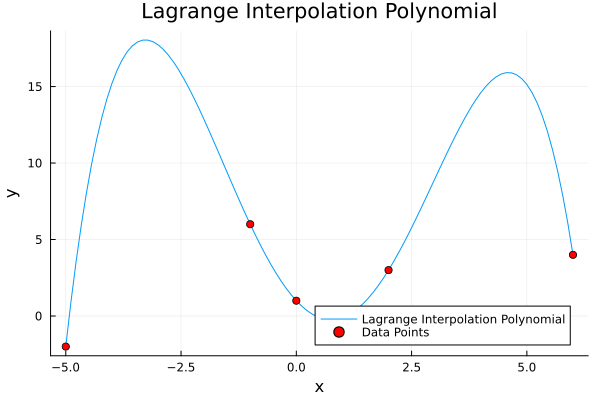

In [12]:
import Pkg
Pkg.add("Plots")
using Plots

function LagrangeInterpolate(xPoints, yPoints, givenPoint)
    pointsAmount = length(xPoints)
    result = 0.0                                                        #Function która przyjmuje zestaw x i y punktów interpolacji oraz x dla którego chcemy wyliczyć wartość 
    for i in 1:pointsAmount
        numerator = 1.0
        denominator = 1.0
        for j in 1:pointsAmount
            if i != j
                numerator *= (givenPoint - xPoints[j])
                denominator *= (xPoints[i] - xPoints[j])
            end
        end
        
        result += (numerator / denominator) * yPoints[i]
    end
    return result
end

#=function generate_random_points(range_start, range_end, num_points)     #funkcja która generuje losowe punkty interpolacji z zadanego przedziału w ilości "num_points"
    return rand(range_start:0.01:range_end, num_points)
end

start_point = 0
end_point = 10
points = 6

xPoints = generate_random_points(start_point, end_point, points)        #tablice zawierają punkty interpolacji
yPoints = generate_random_points(start_point, end_point, points)                                                          
=#

xPoints = [-5.0, -1.0, 0.0, 2.0, 6.0]                                        #tablice zawierają punkty interpolacji
yPoints = [-2.0, 6.0, 1.0, 3.0, 4.0]

x_range = range(minimum(xPoints), maximum(xPoints), length=100)        #dodajemy tutaj dodatkowe punkty dla których wartości liczymy za pmocą naszej funkcji, Użyjemy ich do 
y_range = [LagrangeInterpolate(xPoints, yPoints, x) for x in x_range]   #rysowania wykresu 

plot(x_range, y_range, label="Lagrange Interpolation Polynomial", title="Lagrange Interpolation Polynomial", xlabel="x", ylabel="y")
scatter!(xPoints, yPoints, label="Data Points", color=:red)





Zadanie 2

   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`


Any[-2.0, 2.0, -1.4, 0.4857142857142857, -0.07175324675324675]
-5.0	-2.0	2.0	-1.4	0.4857142857142857	-0.07175324675324675	
-1.0	6.0	-5.0	2.0	-0.30357142857142855	0.0	
0.0	1.0	1.0	-0.125	0.0	0.0	
2.0	3.0	0.25	0.0	0.0	0.0	
6.0	4.0	0.0	0.0	0.0	0.0	
-0.11038961038960782


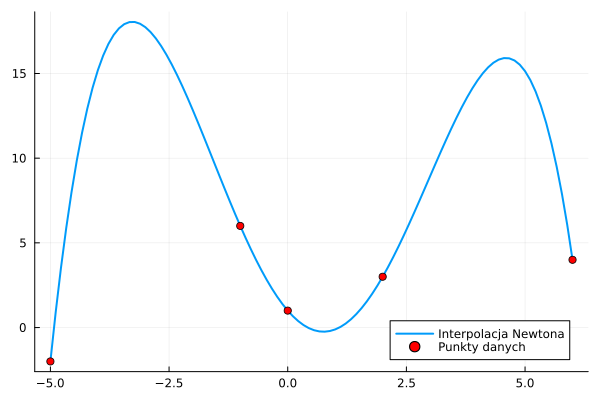

In [1]:
import Pkg
Pkg.add("Plots")
using Plots

function NewtonInterpolation(x_points, y_points)
    n = length(x_points)
    matrixColumnSize = n+1
    matrix = zeros(n, matrixColumnSize)                                 #tworzenie macierzy o n wierszach i n+1 kolumnach
    for i in 1:n
        matrix[i, 1] = x_points[i]                                      #wpisanie znanych wartości punktów interpolacji do macierzy
        matrix[i, 2] = y_points[i]
    end

    curr_amount = n-1
    for column in 3:matrixColumnSize
        for row in 1:curr_amount
            curr_value = (matrix[row + 1, column -1] - matrix[row, column-1])/(matrix[row+column-2, 1] - matrix[row, 1])    #wypełnianie macierzy wyliczanymi wartościami
            matrix[row, column] = curr_value
        end
        curr_amount -= 1
    end

    parameters = []                                                                 #wyciągnięcie wartości parametrów z macierzy do tablicy jednowymiarowej
    for i in 2:matrixColumnSize
        push!(parameters, matrix[1, i])
    end

    formula = createFormula(parameters, x_points)                                   #tworzenie wzoru za pomocą przekazania znanych już parametrów i punktów x 

    return parameters, matrix, formula
end

function addPoint(matrix, x_point, y_point, x_points, y_points)                     #dodanie nowego punktu interpolacji do zdefiniowanej wcześniej macierzy z początkowymi
    rows, cols = size(matrix)                                                       #wartościami
    matrix = vcat(matrix, zeros(1, cols))
    matrix = hcat(matrix, zeros(rows + 1, 1))

    matrix[rows+1, 1] = x_point
    matrix[rows+1, 2] = y_point

    starter = rows

    rows, cols = size(matrix)

    for column in 3:cols
        matrix[starter, column] = (matrix[starter + 1, column -1] - matrix[starter, column-1])/(matrix[rows, 1] - matrix[starter, 1])
        starter -= 1
    end

    parameters = []

    for i in 2:cols
        push!(parameters, matrix[1, i])
    end
    push!(x_points, x_point)
    push!(x_points, x_point)
    return matrix, parameters, x_points, y_points
end

function createFormula(parameters, x_points)                                #funkcja która tworzy matematyczny wzór na wielomian zgodnie ze schematem hornera
    function NewtonPolynomial(x)                                            #do którego wystarczy podstawić x aby uzyskać dla niego wartość 
        result = parameters[1]
        n = length(parameters)
        for i in 2:n
            curr = parameters[i]
            for j in 1:(i-1)
                curr *= (x - x_points[j])
            end
            result += curr
        end
        return result
    end
    return NewtonPolynomial
end


function printMatrix(matrix)                                                #pomocnicza funkcja do wypisania macierzy
    rows, cols = size(matrix)  
    for i in 1:rows
        for j in 1:cols
            print(matrix[i, j], "\t")  
        end
        println()  
    end
end
    
x_points = [-5.0, -1.0, 0.0, 2.0, 6.0]
y_points = [-2.0, 6.0, 1.0, 3.0, 4.0]

parameters, diff_quotients, formula = NewtonInterpolation(x_points, y_points)

println(parameters)        
printMatrix(diff_quotients)                                                                             
println(formula(1.0))

#=
for i in 1:length(x_points)                                                                                               #test czy wartości dla punktów interpolacji się zgadzają
    println(formula(x_points[i]))
end
=#
#=
x_point_to_add = 7.0
y_point_to_add = 5.0
                                                                                                                            #Do testowania dodawania nowych punktów interpolacji
printMatrix(diff_quotients)                                                                                                   #na czas testów zakomentuję
matrix, parameters, x_points, y_points = addPoint(diff_quotients, x_point_to_add, y_point_to_add, x_points, y_points)
formula = createFormula(parameters, x_points)
printMatrix(matrix)
println(parameters)
=#


X_range = range(minimum(x_points), maximum(x_points), length=100) 
Y_values = [formula(x) for x in X_range]

plot(X_range, Y_values, label="Interpolacja Newtona", linewidth=2)
scatter!(x_points, y_points, label="Punkty danych", color=:red)



Zadanie 3

   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`


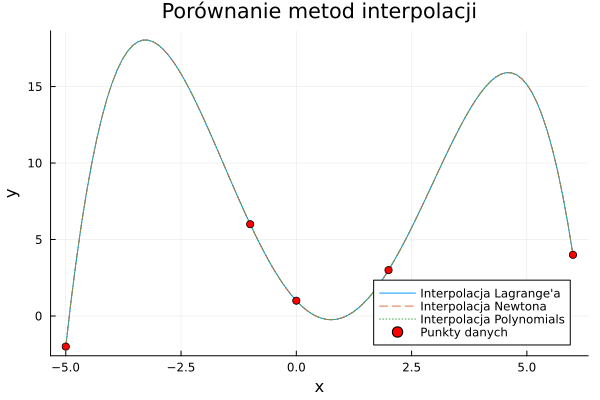

In [6]:
import Pkg
Pkg.add("Polynomials")
using Plots, Polynomials

function LagrangeInterpolate(xPoints, yPoints, givenPoint)
    pointsAmount = length(xPoints)
    result = 0.0                                                        
    for i in 1:pointsAmount
        numerator = 1.0
        denominator = 1.0
        for j in 1:pointsAmount
            if i != j
                numerator *= (givenPoint - xPoints[j])
                denominator *= (xPoints[i] - xPoints[j])
            end
        end
        
        result += (numerator / denominator) * yPoints[i]
    end
    return result
end

function NewtonInterpolation(x_points, y_points)
    n = length(x_points)
    matrixColumnSize = n+1
    matrix = zeros(n, matrixColumnSize)                                 #tworzenie macierzy o n wierszach i n+1 kolumnach
    for i in 1:n
        matrix[i, 1] = x_points[i]                                      #wpisanie znanych wartości punktów interpolacji do macierzy
        matrix[i, 2] = y_points[i]
    end

    curr_amount = n-1
    for column in 3:matrixColumnSize
        for row in 1:curr_amount
            curr_value = (matrix[row + 1, column -1] - matrix[row, column-1])/(matrix[row+column-2, 1] - matrix[row, 1])    #wypełnianie macierzy wyliczanymi wartościami
            matrix[row, column] = curr_value
        end
        curr_amount -= 1
    end

    parameters = []                                                                 #wyciągnięcie wartości parametrów z macierzy do tablicy jednowymiarowej
    for i in 2:matrixColumnSize
        push!(parameters, matrix[1, i])
    end

    formula = createFormula(parameters, x_points)                                   #tworzenie wzoru za pomocą przekazania znanych już parametrów i punktów x 

    return parameters, matrix, formula
end

function createFormula(parameters, x_points)                                #funkcja która tworzy matematyczny wzór na wielomian zgodnie ze schematem hornera
    function NewtonPolynomial(x)                                            #do którego wystarczy podstawić x aby uzyskać dla niego wartość 
        result = parameters[1]
        n = length(parameters)
        for i in 2:n
            curr = parameters[i]
            for j in 1:(i-1)
                curr *= (x - x_points[j])
            end
            result += curr
        end
        return result
    end
    return NewtonPolynomial
end

# Dane wspólne dla wszystkich metod
xPoints = [-5.0, -1.0, 0.0, 2.0, 6.0]
yPoints = [-2.0, 6.0, 1.0, 3.0, 4.0]
x_range = range(minimum(xPoints), maximum(xPoints), length=100)

# Interpolacja Lagrange'a (wcześniej zdefiniowana funkcja LagrangeInterpolate)
y_range_lagrange = [LagrangeInterpolate(xPoints, yPoints, x) for x in x_range]

# Interpolacja Newtona (wcześniej zdefiniowana funkcja NewtonInterpolation i createFormula)
_, _, formula_newton = NewtonInterpolation(xPoints, yPoints)
y_range_newton = [formula_newton(x) for x in x_range]

# Interpolacja za pomocą pakietu Polynomials
fit_poly = fit(xPoints, yPoints) # Użycie funkcji fit do stworzenia wielomianu interpolującego
y_range_poly = [fit_poly(x) for x in x_range] # Ocena wielomianu na zakresie x

# Wykres porównawczy
plot(x_range, y_range_lagrange, label="Interpolacja Lagrange'a", title="Porównanie metod interpolacji", xlabel="x", ylabel="y")
plot!(x_range, y_range_newton, label="Interpolacja Newtona", linestyle=:dash)
plot!(x_range, y_range_poly, label="Interpolacja Polynomials", linestyle=:dot)
scatter!(xPoints, yPoints, label="Punkty danych", color=:red)



Wykresy są identyczne, ponieważ wszystkie trzy metody interpolacji wielomianowej - Lagrange'a, Newtona i metoda z pakietu Polynomials (która również opiera się na wielomianach interpolacyjnych) - dla danego zestawu punktów danych, tworzą dokładnie ten sam wielomian interpolacyjny. Jest to fundamentalna właściwość interpolacji wielomianowej: dla określonego zestawu punktów, istnieje dokładnie jeden wielomian najniższego możliwego stopnia, który przechodzi przez wszystkie te punkty. W rezultacie, niezależnie od metody obliczania tego wielomianu, wynik będzie taki sam.

Zadanie 4

In [13]:
using Pkg
Pkg.add(["Plots", "Polynomials", "BenchmarkTools"])
using Plots, Polynomials, BenchmarkTools

function LagrangeInterpolate(xPoints, yPoints, givenPoint)
    pointsAmount = length(xPoints)
    result = 0.0                                                        
    for i in 1:pointsAmount
        numerator = 1.0
        denominator = 1.0
        for j in 1:pointsAmount
            if i != j
                numerator *= (givenPoint - xPoints[j])
                denominator *= (xPoints[i] - xPoints[j])
            end
        end
        
        result += (numerator / denominator) * yPoints[i]
    end
    return result
end

function NewtonInterpolation(x_points, y_points)
    n = length(x_points)
    matrixColumnSize = n+1
    matrix = zeros(n, matrixColumnSize)                                 #tworzenie macierzy o n wierszach i n+1 kolumnach
    for i in 1:n
        matrix[i, 1] = x_points[i]                                      #wpisanie znanych wartości punktów interpolacji do macierzy
        matrix[i, 2] = y_points[i]
    end

    curr_amount = n-1
    for column in 3:matrixColumnSize
        for row in 1:curr_amount
            curr_value = (matrix[row + 1, column -1] - matrix[row, column-1])/(matrix[row+column-2, 1] - matrix[row, 1])    #wypełnianie macierzy wyliczanymi wartościami
            matrix[row, column] = curr_value
        end
        curr_amount -= 1
    end

    parameters = []                                                                 #wyciągnięcie wartości parametrów z macierzy do tablicy jednowymiarowej
    for i in 2:matrixColumnSize
        push!(parameters, matrix[1, i])
    end

    formula = createFormula(parameters, x_points)                                   #tworzenie wzoru za pomocą przekazania znanych już parametrów i punktów x 

    return parameters, matrix, formula
end

function createFormula(parameters, x_points)                                #funkcja która tworzy matematyczny wzór na wielomian zgodnie ze schematem hornera
    function NewtonPolynomial(x)                                            #do którego wystarczy podstawić x aby uzyskać dla niego wartość 
        result = parameters[1]
        n = length(parameters)
        for i in 2:n
            curr = parameters[i]
            for j in 1:(i-1)
                curr *= (x - x_points[j])
            end
            result += curr
        end
        return result
    end
    return NewtonPolynomial
end


# Pomiar czasu dla interpolacji
node_counts = [5, 10, 15]
iterations = 10

lagrange_times_means = []
lagrange_times_stds = []
newton_times_means = []
newton_times_stds = []
newton_eval_times_means = []
newton_eval_times_stds = []
polynomials_times_means = []
polynomials_times_stds = []
polynomials_eval_times_means = []
polynomials_eval_times_stds = []

#20, 25, 30, 35, 40
for count in node_counts
    xNumbers = LinRange(-5.0, 5.0, count)
    yNumbers = sin.(xNumbers)  #Stwierdziłem że sinusy z wartości będą ciekawymi wartościami dla interpolacji 
    _, _, formula_newton = NewtonInterpolation(xNumbers, yNumbers)
    polyEval = fit(xNumbers, yNumbers)

    # Pomiar dla Lagrange'a
    lagrange_bench_times = [(@belapsed [LagrangeInterpolate($xNumbers, $yNumbers, x) for x in $xNumbers]) for _ in 1:iterations]
    push!(lagrange_times_means, mean(lagrange_bench_times) * 1e3) # ms
    push!(lagrange_times_stds, std(lagrange_bench_times) * 1e3) 

    # Pomiar dla Newtona (tworzenie)
    newton_bench_times = [(@belapsed NewtonInterpolation($xNumbers, $yNumbers)) for _ in 1:iterations]
    push!(newton_times_means, mean(newton_bench_times) * 1e3) 
    push!(newton_times_stds, std(newton_bench_times) * 1e3) 

    # Pomiar dla Newtona (ewaluacja)

    newton_eval_bench_times = [(@belapsed [formula_newton(x) for x in $xNumbers]) for _ in 1:iterations]
    push!(newton_eval_times_means, mean(newton_eval_bench_times) * 1e3) 
    push!(newton_eval_times_stds, std(newton_eval_bench_times) * 1e3) 

    # Pomiar dla Polynomials (tworzenie)
    polynomials_bench_times = [(@belapsed fit($xNumbers, $yNumbers)) for _ in 1:iterations]
    push!(polynomials_times_means, mean(polynomials_bench_times) * 1e3) 
    push!(polynomials_times_stds, std(polynomials_bench_times) * 1e3) 

    # Pomiar dla Polynomials (ewaluacja)
    polynomials_eval_bench_times = [(@belapsed [polyEval(x) for x in $xNumbers]) for _ in 1:iterations]
    push!(polynomials_eval_times_means, mean(polynomials_eval_bench_times) * 1e3) 
    push!(polynomials_eval_times_stds, std(polynomials_eval_bench_times) * 1e3) 
end

# Tworzenie wykresów z błędami
plot(node_counts, lagrange_times_means, ribbon=lagrange_times_stds, label="Lagrange", title="Czas obliczeń [ms]", xlabel="Ilość węzłów", ylabel="Czas [ms]", marker=:circle)
plot!(node_counts, newton_times_means, ribbon=newton_times_stds, label="Newton - Tworzenie", marker=:circle)
plot!(node_counts, polynomials_times_means, ribbon=polynomials_times_stds, label="Polynomials - Tworzenie", marker=:circle)
plot!(node_counts, newton_eval_times_means, ribbon=newton_eval_times_stds, label="Newton - Ewaluacja", linestyle=:dash, marker=:circle)
plot!(node_counts, polynomials_eval_times_means, ribbon=polynomials_eval_times_stds, label="Polynomials - Ewaluacja", linestyle=:dash, marker=:circle)
display(plot!())


   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`


Zadanie 5

In [8]:
function neville(x_points, y_points, x)
    n = length(x_points)
    Q = zeros(n, n)
    Q[:, 1] = y_points
    for i in 2:n
        for j in 2:i
            Q[i, j] = ((x - x_points[i-j+1]) * Q[i, j-1] - (x - x_points[i]) * Q[i-1, j-1]) / (x_points[i] - x_points[i-j+1])
        end
    end
    return Q[n, n]
end


# Przykładowe punkty danych
x_points = [-5.0, -1.0, 0.0, 2.0, 6.0]
y_points = [-2.0, 6.0, 1.0, 3.0, 4.0]
test_points = [-3, 1, 5] # Punkty do sprawdzenia

# Wyniki interpolacji
for x in test_points
    val_lagrange = LagrangeInterpolate(x_points, y_points, x)
    val_neville = neville(x_points, y_points, x)
    println("Punkt x=$x: Lagrange = $val_lagrange, Neville = $val_neville, Różnica = $(abs(val_lagrange - val_neville))")
end

Punkt x=-3: Lagrange = 17.73376623376623, Neville = 17.733766233766232, Różnica = 3.552713678800501e-15
Punkt x=1: Lagrange = -0.11038961038961048, Neville = -0.1103896103896104, Różnica = 8.326672684688674e-17
Punkt x=5: Lagrange = 15.136363636363637, Neville = 15.136363636363637, Różnica = 0.0


Algorytm Nevile'a daje prawie identyczne wartości jak wybrany przeze mnie algorytm Newtona 

Zadanie 6


Efekt Rungego to zjawisko numeryczne występujące w interpolacji wielomianowej, kiedy stopień wielomianu interpolacyjnego wzrasta, a przybliżenie staje się coraz gorsze, zwłaszcza na końcach przedziału interpolacji

   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`


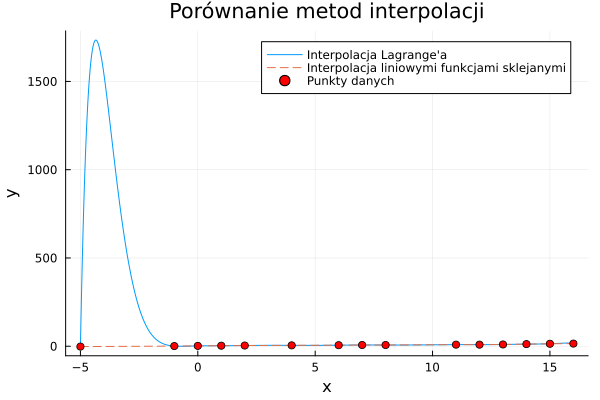

In [7]:
using Pkg
Pkg.add("Interpolations")
using Interpolations, Plots

function LagrangeInterpolate(xPoints, yPoints, givenPoint)
    pointsAmount = length(xPoints)
    result = 0.0                                                        
    for i in 1:pointsAmount
        numerator = 1.0
        denominator = 1.0
        for j in 1:pointsAmount
            if i != j
                numerator *= (givenPoint - xPoints[j])
                denominator *= (xPoints[i] - xPoints[j])
            end
        end
        result += (numerator / denominator) * yPoints[i]
    end
    return result
end

x_points = [−5.0,−1.0,0.0,1.0,2.0,4.0,6.0,7.0,8.0,11.0,12.0,13.0,14.0,15.0,16.0]
y_points = [−2.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,7.0,9.0,9.0,10.0,12.0,14.0,15.0]

x_fine = LinRange(minimum(x_points), maximum(x_points), 1000)

# Interpolacja Lagrange'a na posortowanych danych
y_lagrange = [LagrangeInterpolate(x_points, y_points, x) for x in x_fine]

# Interpolacja liniowymi funkcjami sklejanymi
itp = interpolate((x_points,), y_points, Gridded(Linear()))
y_linear = [itp(x) for x in x_fine]

# Rysowanie wykresów
plot(x_fine, y_lagrange, label="Interpolacja Lagrange'a", title="Porównanie metod interpolacji", xlabel="x", ylabel="y")
plot!(x_fine, y_linear, label="Interpolacja liniowymi funkcjami sklejanymi", linestyle=:dash)
scatter!(x_points, y_points, label="Punkty danych", color=:red)


Ewidentnie na początkowym krańcu przedziału przy dużej liczbie punktów interpolacji dostrzegalny jest Efekt Rungego - funkcja znacząco odbiega od pozostałych wartości 